## CUSTOMER SEGMENTATION ANALYSIS :

<b>Project Description:</b> The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. 
By analyzing customer behavior and purchase patterns, the goal is togroup customers into distinct segments. 
This segmentation can inform targeted marketingstrategies, improve customer satisfaction, and enhance overall business strategies.


<b>Key Concepts and Challenges:</b></br>

1.) Data Collection: Obtain a dataset containing customer information, purchase history, and relevant data.</br>
2.) Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle any missing or inconsistent data.</br>
3.) Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of purchases, etc.</br>
4.) Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns.</br>
5.) Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.</br>
6.) Insights and Recommendations: Analyze characteristics of each segment and provide insights.</br>

#### Import Libraries :

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the Dataset :

In [43]:
df = pd.read_csv('ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


#### Data preprocessing :

In [44]:
## Checking Missing Values : 

df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [45]:
### Checking Duplicacy :

df.duplicated().sum()

df = df.drop_duplicates()

In [46]:
### Check Datatypes :

df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

#### Drop Unnecessary Columns :

In [47]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

#### Basic Statistics :

In [48]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [49]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

#### Descriptive Statistics : Key Metrics 

In [50]:
## Calculate Total Amount spent on all products :
df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

## Calculate Average Purchase Value :
AvgPurchaseValue = df['MntTotal'].mean()
print('Average Purchase Value: ', AvgPurchaseValue)

## Calculate Average Purchase Frequency :
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
average_purchase_frequency = df['TotalPurchases'].mean()
print(f'Average Purchase Frequency: {average_purchase_frequency}')

Average Purchase Value:  607.7110341415141
Average Purchase Frequency: 14.897575457694211


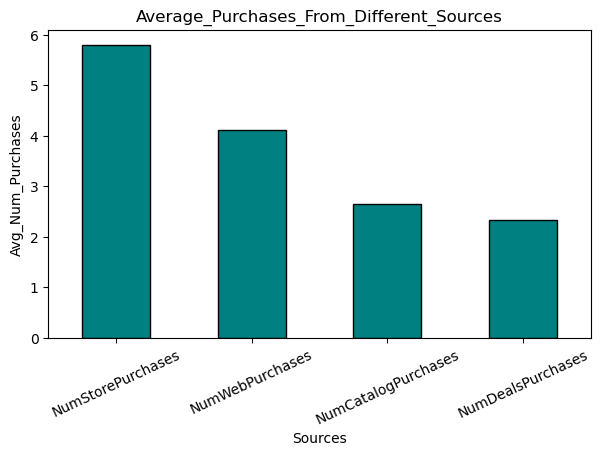

In [51]:
## Average Number of Purchases from Different Sources :

source = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
avg_purchases_per_source = df[source].mean()

avg_purchases_per_source = avg_purchases_per_source.sort_values(ascending=False) 

plt.figure(figsize=(7,4))
avg_purchases_per_source.plot(kind='bar',color='teal', edgecolor='black')
plt.title('Average_Purchases_From_Different_Sources')
plt.xlabel('Sources')
plt.ylabel('Avg_Num_Purchases')
plt.xticks(rotation=25)
plt.show()

Avg_Recency:  48.880752102919345


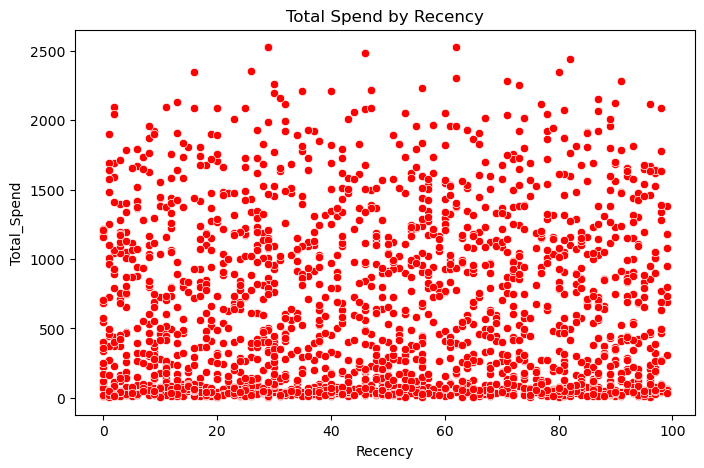

In [52]:
## Calculate the Average Recency and plot :

avg_recency = df['Recency'].mean()
print('Avg_Recency: ',avg_recency)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Recency', y='MntTotal', data=df, color='red')
plt.title('Total Spend by Recency')
plt.xlabel('Recency')
plt.ylabel('Total_Spend')
plt.show()

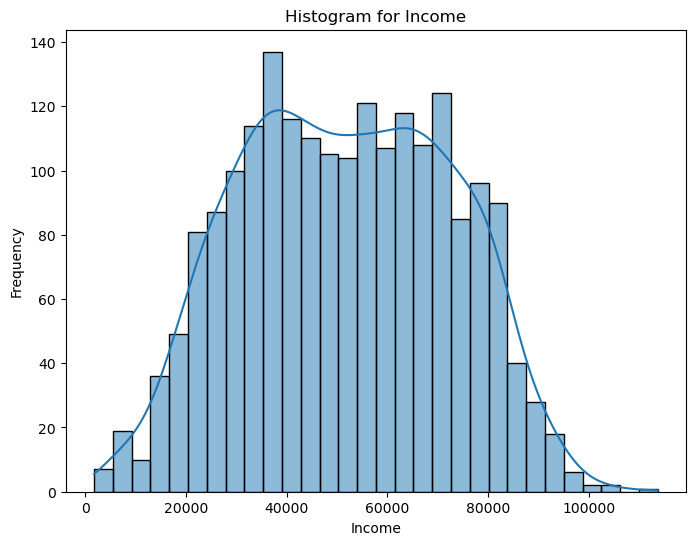

In [53]:
## Income Distribution :

plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#### Correlation Analysis :

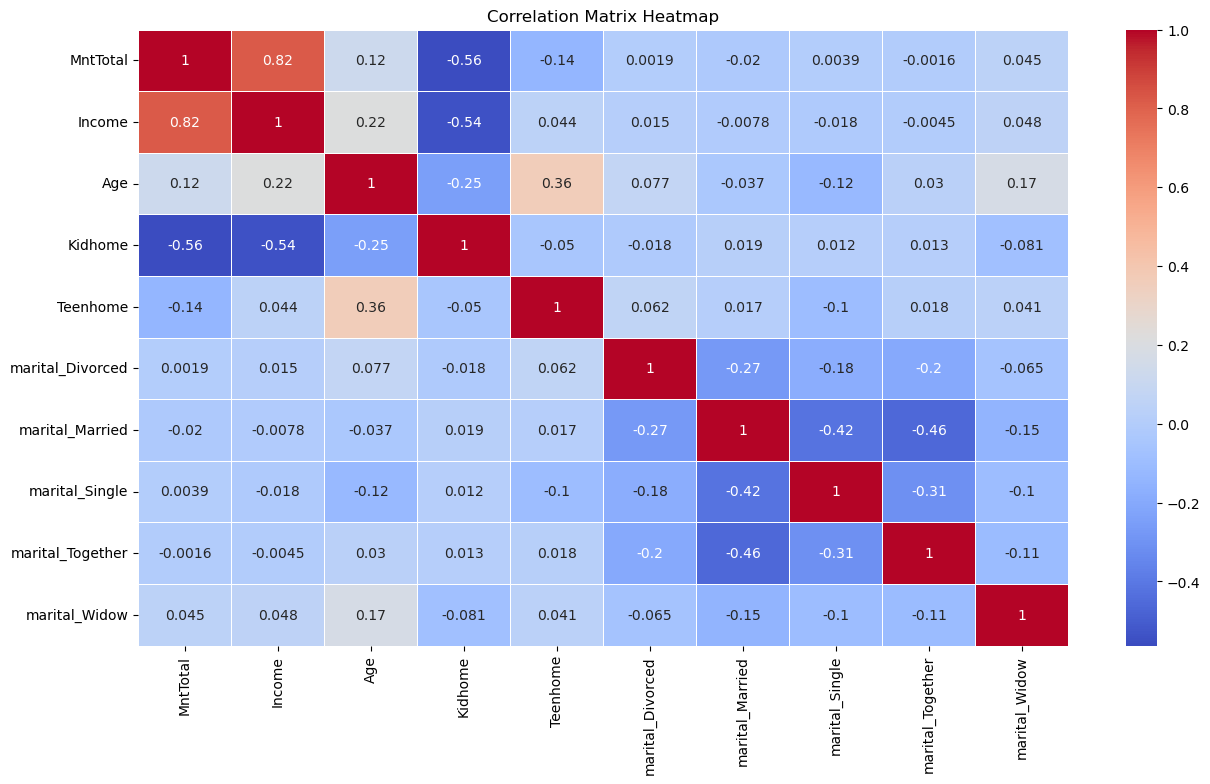

In [54]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

## Plotting Correlation Matrix :

corr_matrix = df[['MntTotal']+cols_demographics+cols_children+cols_marital].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Feature Engineering

In [55]:
def marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Single'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Married'
    elif row['marital_Widow'] == 1:
        return 'Single'
    else:
        return 'Unknown'
        
df['Marital'] = df.apply(marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

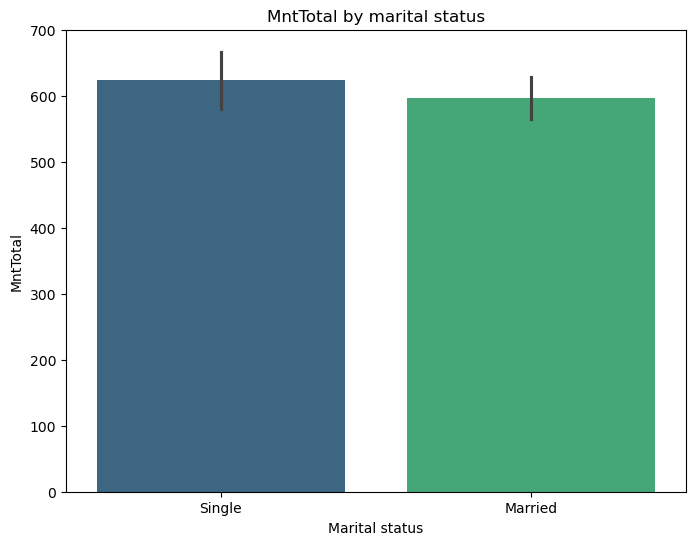

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [56]:
def education_level(row):
    if row['education_2n Cycle'] == 1:
        return 'Graduation'
    elif row['education_Basic'] == 1:
        return 'Basic'
    elif row['education_Graduation'] == 1:
        return 'Graduation'
    elif row['education_Master'] == 1:
        return 'Master'
    elif row['education_PhD'] == 1:
        return 'PhD'
    else:
        return np.nan                             

df['Education'] = df.apply(education_level, axis=1)

In [57]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)

In [58]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalPurchases,Marital,Education,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1617,1441,0,25,Single,Graduation,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,27,15,0,6,Single,Graduation,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,776,692,0,21,Married,Graduation,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,53,43,0,8,Married,Graduation,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,422,392,0,19,Married,PhD,1


## Customer Segmentation :

#### Standardising Data :

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler()
x = ['Income', 'MntTotal', 'In_relationship']
df1 = df.copy()

if 'In_relationship' in df.columns:
    df1[x] = sc.fit_transform(df[x])
else:
    x.remove('In_relationship')

sc_df1 = pd.DataFrame(df1[x], columns= df[x].columns)
sc_df1.head()

,Income,MntTotal,In_relationship
0,0.311511,1.675872,-1.334135
1,-0.258030,-0.964240,-1.334135
2,0.962228,0.279435,0.749549
3,-1.209260,-0.921069,0.749549
4,0.318996,-0.308364,0.749549


In [61]:
### Checking all the Values (to be in similar range now after Fitting Standardization)..

In [62]:
sc_df1.describe()

,Income,MntTotal,In_relationship
count,2.021000e+03,2.021000e+03,2.021000e+03
mean,-1.494214e-17,-3.340008e-17,-8.965284e-17
std,1.000247e+00,1.000247e+00,1.000247e+00
min,-2.412471e+00,-1.000770e+00,-1.334135e+00
25%,-7.857505e-01,-8.945016e-01,-1.334135e+00
50%,-1.329244e-02,-3.498747e-01,7.495491e-01
75%,8.009853e-01,7.310769e-01,7.495491e-01
max,2.996281e+00,3.183559e+00,7.495491e-01


In [63]:
#### The mean value for all colums is almost zero and the standard deviation is almost 1. All the data points were replaced by their z-scores.

#### PCA

In [64]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(df1[x])
df1['pc1'] = pca_res[:,0]
df1['pc2'] = pca_res[:,1]

### Elbow - Method => To Determine the Optimal Number of Clusters :

In [65]:
from sklearn.cluster import KMeans

In [66]:
wcss = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(df1[x])                           ## model training on Scaled Data (used Standardization).
    wcss.append(model.inertia_)
print(wcss)

[6062.999999999998, 3260.1600545693345, 1999.6860526637954, 1238.9438763733347, 939.1779769898703, 772.9752166736506, 621.2922247485301, 533.3087120787839, 464.12698114070463, 424.89443284440097, 391.5836370735185, 361.44227699476403, 334.77853390302596, 309.02173827333314]


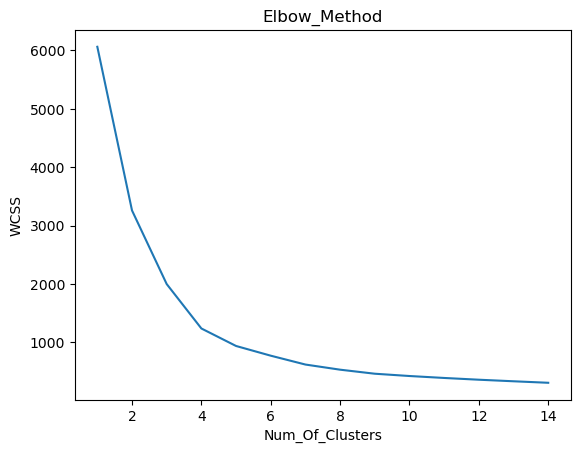

In [67]:
plt.plot(list(range(1,15)),wcss)
plt.xlabel('Num_Of_Clusters')
plt.ylabel('WCSS')
plt.title('Elbow_Method')
plt.show()

#### Inference :
###### Optimal Number of Clusters = 3 to 4

### Silhouette Score Analysis :

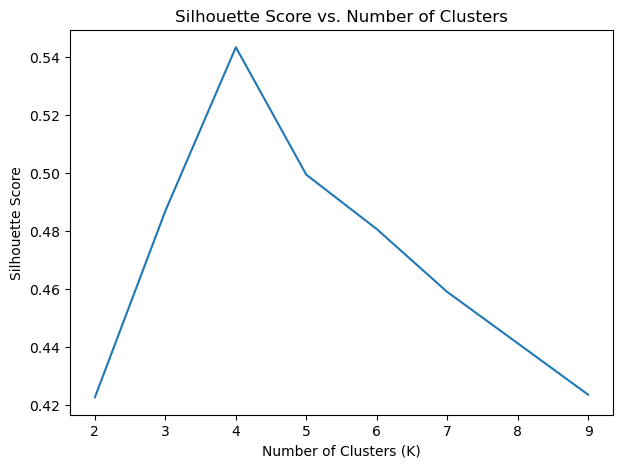

In [68]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(df1[x])
    s_avg = silhouette_score(df1[x], clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

#### Inference :
###### The highest silhouette score is for 4 clusters.

In [69]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(df1[x])
df1['Cluster'] = model.predict(df1[x])

#### Visualisation of clusters :

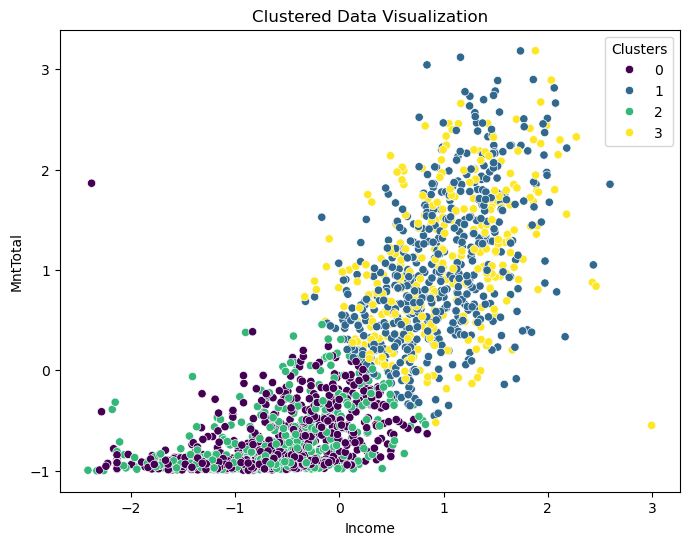

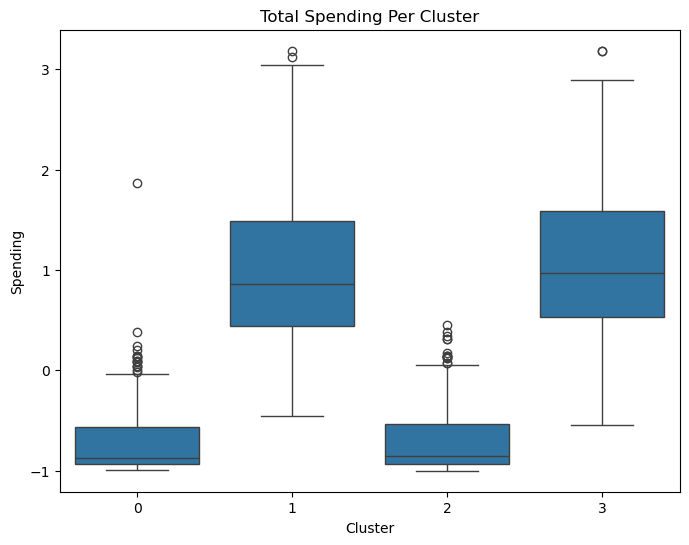

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df1, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')
plt.show()


## Boxplot to analyse total spending across clusters :
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='MntTotal', data=df1)
plt.title('Total Spending Per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending')
plt.show()

In [71]:
df['Cluster'] = df1.Cluster
df.groupby('Cluster')[x].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,37476.055482,170.412153,1.0
1,71270.357542,1200.571695,1.0
2,37703.352113,183.143192,0.0
3,72281.614618,1250.684385,0.0


### Mean consumption of different product types by cluster :

In [72]:
mnt_df = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_df.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,170.412153,126.089828,85.273448,7.075297,37.796565,10.785997,7.319683,22.161162
1,1,1200.571695,1056.806331,612.627561,51.882682,335.536313,74.191806,54.450652,71.882682
2,2,183.143192,131.913146,89.922535,8.286385,40.227700,11.274648,7.816901,25.615023
3,3,1250.684385,1101.335548,623.192691,54.936877,364.368771,77.036545,56.475083,74.674419


#### Cluster Sizes :

In [73]:
cluster_sizes = df1.groupby('Cluster')[['MntTotal']].count().reset_index()
total_rows = len(df1)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,757,37.0
1,1,537,27.0
2,2,426,21.0
3,3,301,15.0


### Income By Clusters :

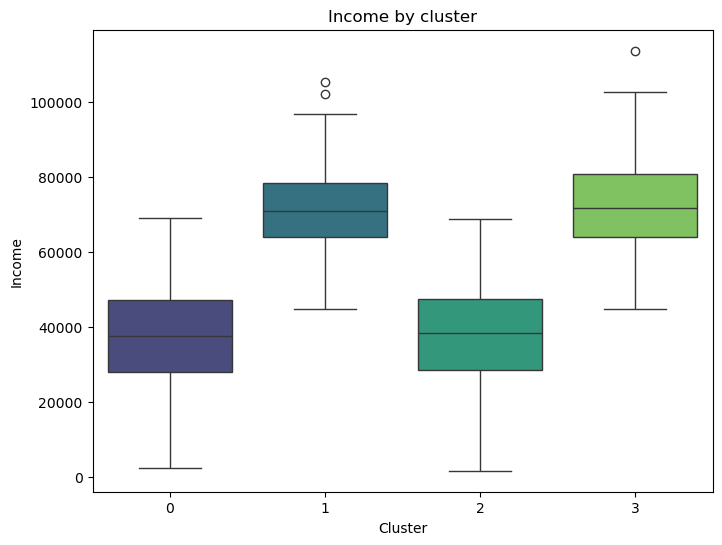

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

### In_Relationship Feature By Clusters :

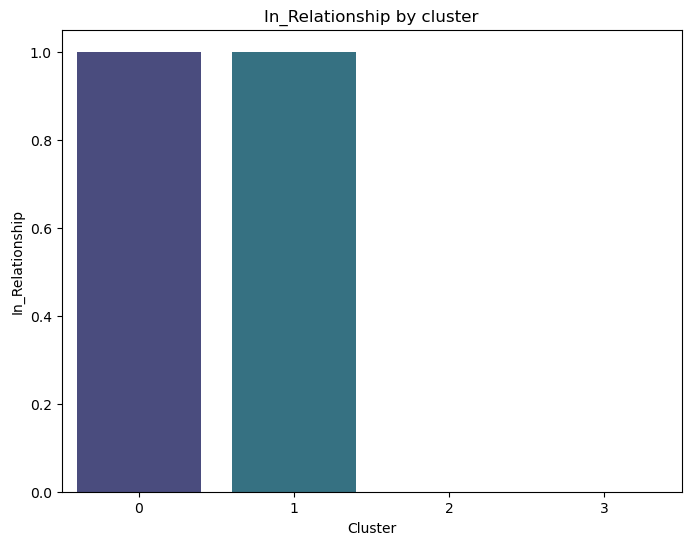

In [82]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=df, palette='viridis')
plt.title('In_Relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_Relationship')
plt.show()

#### Group By Clusters and Calculate Avg Metrics :

In [75]:
cluster_summary = df.groupby(['Cluster'])[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'TotalPurchases']].mean()

cluster_summary

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalPurchases
Cluster,,,,,,,,,,,,,,,,,,,,,
0,37476.055482,0.697490,0.538970,49.248349,85.273448,7.075297,37.796565,10.785997,7.319683,22.161162,...,0.000000,0.104359,0.038309,0.488771,0.177015,0.191546,170.412153,126.089828,0.100396,10.040951
1,71270.357542,0.115456,0.500931,48.376164,612.627561,51.882682,335.536313,74.191806,54.450652,71.882682,...,0.000000,0.080074,0.000000,0.510242,0.162011,0.247672,1200.571695,1056.806331,0.584730,21.795158
2,37703.352113,0.676056,0.537559,48.309859,89.922535,8.286385,40.227700,11.274648,7.816901,25.615023,...,0.072770,0.082160,0.046948,0.502347,0.157277,0.211268,183.143192,131.913146,0.117371,10.312207
3,72281.614618,0.059801,0.411960,49.664452,623.192691,54.936877,364.368771,77.036545,56.475083,74.674419,...,0.129568,0.086379,0.000000,0.521595,0.156146,0.235880,1250.684385,1101.335548,0.568106,21.295681


# Derived Insights:

<b>Income Distribution:</b></br>
Cluster 1 (High Income): With an average income of 71,270, Cluster 1 represents the high-income group, indicating strong purchasing power.</br>
Cluster 3 (Moderate-High Income): The average income of 72,281 is almost identical to Cluster 1, suggesting that income alone may not be the only factor determining product preferences.</br>
Cluster 0 (Lower-Mid Income): The average income of 37,476 reflects a more moderate income range, implying that consumers in this cluster are more budget-conscious.</br>
Cluster 2 (Lower-Mid Income): With an income of 37,703, this cluster is similar to Cluster 0 in terms of income.</br>


<b>Total Consumption (MntTotal):</b></br>
Cluster 1 (High Consumption): The average total consumption is 1,200, much higher than the other clusters, indicating this group spends significantly more on products.</br>
Cluster 3 (Moderate Consumption): At 1,250, Cluster 3 spends similarly to Cluster 1 but may have a different product consumption pattern.</br>
Cluster 0 & Cluster 2 (Low Consumption): Both Cluster 0 and Cluster 2 have much lower total consumption (170 and 183, respectively), suggesting these groups are more price-sensitive or purchase fewer items.</br>

<b>Relationship Status:</b></br>
Cluster 0 & 1 (In Relationship): Both clusters are characterized by a higher proportion of individuals who are in relationships (relationship status = 1). This might indicate that these groups are more stable and have higher household incomes to spend on premium products.</br>
Cluster 2 & 3 (Not in Relationship): The proportion of people not in relationships is high in these clusters, suggesting that relationship status might correlate with higher spending on certain products, especially for Cluster 1.</br>

<b>Cluster Sizes:</b></br>
Cluster 0 (37% of Total): This is the largest segment, reflecting a broad base of lower-to-middle-income consumers.</br>
Cluster 1 (27% of Total): This group is substantial in size and likely represents a core of high-value customers.</br>
Cluster 2 (21% of Total): This cluster is smaller but still significant, representing lower-to-middle-income customers with a moderate spend.</br>
Cluster 3 (15% of Total): The smallest group, but with high potential due to their purchasing power.</br>



•	The majority of customers spend less than 500, with very few exceeding 2,000.</br>
•	Income levels are broad, but the median falls in a mid-income range.</br>
•	Spending correlates with features like education and marital status, while some variables (e.g., number of children) show negative correlations.</br>
•	Spending patterns differ significantly across clusters, with some clusters spending much more on regular products.</br>
•	High-spending clusters show significant variability, while low-spending clusters are more consistent.</br>
•   MntTotal has strong positive correlation with income and intermediate negative correlation with Kidhome. Income feature has nearly the same negative correlation with Kidhome and MntTotal</br>

# Recommendations:

•	Implementation of Marketing strategies like exclusive offers for high spenders to increase their engagement. For low spenders, introduce discounts to encourage higher spending.</br>
•	Create reactivation campaigns for customers with high recency, offering personalized discounts or reminders.</br>
•	Investigate the outliers to identify characteristics of high spenders and replicate these traits in marketing strategies.</br>
•	Develop mid-tier product offerings while targeting high-income customers with luxury options.</br>
•	Target younger and middle-aged segments with dynamic campaigns and products suited to their lifestyles.</br>
•	Focus marketing and retention efforts on clusters with high variability to maximize returns.</br>

<b>Targeted Marketing for High-Spending Clusters (Cluster 1 & 3):</b></br>

Cluster 1: Given their high income and total consumption, this cluster is ideal for marketing premium products such as Wines, Meat Products, Fish Products, and Gold Products. Personalized campaigns focusing on luxury items, subscription-based services, or exclusive offers would resonate well.</br>
Cluster 3: This group also spends heavily on Wines and Meat Products, but with significant interest in Sweet Products and Gold Products. Marketing efforts should emphasize value for money without compromising on quality. Offering bundle deals or promotions on these categories could boost spending.</br>


<b>Cost-Sensitive Strategies for Budget-Conscious Consumers (Cluster 0 & 2):</b></br>

Cluster 0: As the largest segment, these customers have a relatively low spend per person. Promotions, discounts, and loyalty programs on Regular Products would likely drive higher engagement. Additionally, emphasizing budget-friendly bundles could incentivize larger purchases.</br>
Cluster 2: This cluster, while still price-sensitive, is more likely to be attracted to deals on Wines and Meat Products. Creating affordable entry-level versions of premium products could help convert this group into more frequent buyers.</br>
